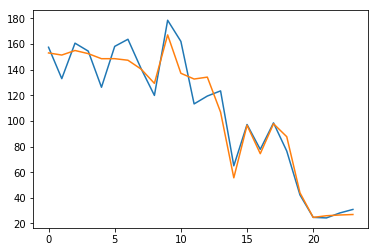

10822


In [ ]:
# External libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.signal import savgol_filter
from keras.models import load_model
from sklearn.svm import SVR
dataset = scipy.io.loadmat('OptimalBiddingTrain.mat')
n1 = 1
n2 = n1
n_days = n2-n1+1
n_blocks = 24*n_days
demand_pred = dataset['Demand_Train_pred']
solar_pred = dataset['Solar_Train_pred']
flat_dp = (demand_pred-solar_pred).flatten()[(n1-1)*24:(n1-1)*24+n_blocks]
demand_real = dataset['Demand_Train']
solar_real = dataset['Solar_Train']
flat_dr = (demand_real-solar_real).flatten()[(n1-1)*24:(n1-1)*24+n_blocks]
plt.plot(range(n_blocks),flat_dp)
plt.plot(range(n_blocks),flat_dr)
plt.show()
print(np.size(np.where((demand_pred-solar_pred).flatten()<(demand_real-solar_real).flatten())))

In [ ]:
temp = (demand_pred- solar_pred).flatten()

model = load_model('demand_opt_bilstm_model.h5')

optimized_non_solar_demand = np.array([])
for h in range(900):
    ns_demand = temp[h*24:(h+1)*24]
    ns_demand_predicted = (np.reshape(model.predict(np.reshape(ns_demand,(1,24,1))),(1,24,))).flatten()
    val_range = max(ns_demand_predicted)-min(ns_demand_predicted)
    ns_demand_predicted =  (25*(1-(ns_demand_predicted/max(ns_demand_predicted))**2)+20*(abs(ns_demand_predicted-val_range/2)/val_range)**2)/2 +np.reshape(savgol_filter(x = ns_demand_predicted.flatten(),window_length=3,polyorder=2),(1,24,))
    optimized_non_solar_demand = np.concatenate((optimized_non_solar_demand,ns_demand_predicted.flatten()))
print(np.size(np.where(optimized_non_solar_demand<(demand_real-solar_real).flatten())))
print(np.where(optimized_non_solar_demand<(demand_real-solar_real).flatten()))
flat_opt = optimized_non_solar_demand[(n1-1)*24:(n1-1)*24+n_blocks]
plt.plot(range(n_blocks),flat_opt)
plt.plot(range(n_blocks),flat_dr)
plt.show()